<a href="https://colab.research.google.com/github/udooz/modern-computer-vision-with-pytorch/blob/main/Chapter02/Building_a_neural_network_using_PyTorch_on_a_toy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch


In [7]:
# check gradient
x = torch.tensor([[2., -1.], [1., 1.]], requires_grad=True)

In [8]:
out = x.pow(2).sum()

In [9]:
out.backward()

In [10]:
x.grad

tensor([[ 4., -2.],
        [ 2.,  2.]])

In [17]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [18]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [20]:
X = X.to(device)
Y = Y.to(device)

In [6]:
import torch.nn as nn

In [12]:
print(nn.Linear(2,7))

Linear(in_features=2, out_features=7, bias=True)


In [11]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [13]:
mynet = MyNeuralNet().to(device)

In [14]:
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[ 0.3012, -0.6273],
        [-0.6618,  0.2905],
        [ 0.6856,  0.5417],
        [-0.2449, -0.6727],
        [ 0.5104, -0.5515],
        [ 0.1704,  0.1401],
        [ 0.0900, -0.4653],
        [ 0.0854,  0.2596]], device='cuda:0', requires_grad=True)

In [16]:
for p in mynet.parameters():
  print(p)

Parameter containing:
tensor([[ 0.3012, -0.6273],
        [-0.6618,  0.2905],
        [ 0.6856,  0.5417],
        [-0.2449, -0.6727],
        [ 0.5104, -0.5515],
        [ 0.1704,  0.1401],
        [ 0.0900, -0.4653],
        [ 0.0854,  0.2596]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 0.1414,  0.2382,  0.3084, -0.2294, -0.3391, -0.0330, -0.6259, -0.2464],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.2349,  0.1891, -0.1746, -0.1643, -0.2667, -0.2514,  0.2896, -0.1185]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.0009], device='cuda:0', requires_grad=True)


In [21]:
loss_func = nn.MSELoss()

In [22]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(137.5987, device='cuda:0', grad_fn=<MseLossBackward0>)


In [23]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [24]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

Text(0, 0.5, 'loss value')

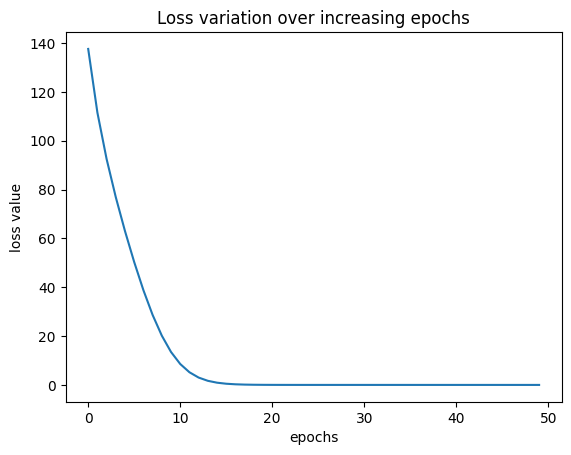

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')